In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score

In [2]:
data_train = pd.read_csv("SalaryData_Train.csv.crdownload",decimal=',')

In [3]:
data_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [4]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19299 entries, 0 to 19298
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            19299 non-null  int64  
 1   workclass      19299 non-null  object 
 2   education      19299 non-null  object 
 3   educationno    19299 non-null  int64  
 4   maritalstatus  19299 non-null  object 
 5   occupation     19299 non-null  object 
 6   relationship   19299 non-null  object 
 7   race           19299 non-null  object 
 8   sex            19299 non-null  object 
 9   capitalgain    19298 non-null  float64
 10  capitalloss    19298 non-null  float64
 11  hoursperweek   19298 non-null  float64
 12  native         19298 non-null  object 
 13  Salary         19298 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 2.1+ MB


In [5]:
data_train.describe().T

,count,mean,std,min,25%,50%,75%,max
age,19299.0,38.511529,13.186730,17.0,28.0,37.0,47.0,90.0
educationno,19299.0,10.124514,2.531343,1.0,9.0,10.0,13.0,16.0
capitalgain,19298.0,1072.832625,7342.426797,0.0,0.0,0.0,0.0,99999.0
capitalloss,19298.0,88.901648,404.365931,0.0,0.0,0.0,0.0,4356.0
hoursperweek,19298.0,40.910561,11.910781,1.0,40.0,40.0,45.0,99.0


In [6]:
data_train.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      1
capitalloss      1
hoursperweek     1
native           1
Salary           1
dtype: int64

In [7]:
data_train[data_train.duplicated()]

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
326,33,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
364,27,Private,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0.0,0.0,50.0,United-States,<=50K
518,24,Private,HS-grad,9,Never-married,Handlers-cleaners,Unmarried,Black,Female,0.0,0.0,40.0,United-States,<=50K
525,24,Private,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0.0,0.0,40.0,United-States,<=50K
619,33,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19273,35,Private,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,0.0,0.0,50.0,United-States,>50K
19274,27,Private,HS-grad,9,Never-married,Handlers-cleaners,Own-child,White,Female,0.0,0.0,40.0,United-States,<=50K
19276,55,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0.0,0.0,40.0,United-States,<=50K
19278,20,Private,Some-college,10,Never-married,Handlers-cleaners,Own-child,White,Male,0.0,0.0,20.0,United-States,<=50K


In [8]:
data_train = data_train.drop_duplicates()

In [9]:
data_train[data_train.duplicated()]

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary


In [10]:
data_test = pd.read_csv("SalaryData_Test.csv",decimal=',')

In [11]:
data_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [12]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [13]:
data_test.describe().T

,count,mean,std,min,25%,50%,75%,max
age,15060.0,38.768327,13.380676,17.0,28.0,37.0,48.0,90.0
educationno,15060.0,10.112749,2.558727,1.0,9.0,10.0,13.0,16.0
capitalgain,15060.0,1120.301594,7703.181842,0.0,0.0,0.0,0.0,99999.0
capitalloss,15060.0,89.041899,406.283245,0.0,0.0,0.0,0.0,3770.0
hoursperweek,15060.0,40.951594,12.062831,1.0,40.0,40.0,45.0,99.0


In [14]:
data_test[data_test.duplicated()]

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
551,59,Private,HS-grad,9,Divorced,Other-service,Not-in-family,White,Female,0,0,40,United-States,<=50K
601,32,Private,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,<=50K
681,40,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
799,24,Private,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,35,United-States,<=50K
1044,44,Private,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,60,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15043,51,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
15044,22,Private,Some-college,10,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
15049,32,Private,HS-grad,9,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,40,United-States,<=50K
15052,31,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K


In [15]:
data_test = data_test.drop_duplicates()

In [16]:
data_test[data_test.duplicated()]

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary


In [17]:
data_test.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [18]:
data_train['Salary'].value_counts()

 <=50K    13302
 >50K      4461
Name: Salary, dtype: int64

In [19]:
data_test['Salary'].value_counts()

 <=50K    10620
 >50K      3510
Name: Salary, dtype: int64

In [20]:
pd.crosstab(data_train['occupation'],data_train['Salary'])

Salary,<=50K,>50K
occupation,,
Adm-clerical,1930,314
Armed-Forces,7,0
Craft-repair,1658,488
Exec-managerial,1236,1121
Farming-fishing,535,68
Handlers-cleaners,686,54
Machine-op-inspct,973,149
Other-service,1846,92
Priv-house-serv,102,0


In [21]:
pd.crosstab(data_train['workclass'],data_train['Salary'])

Salary,<=50K,>50K
workclass,,
Federal-gov,385,229
Local-gov,949,374
Private,9918,2814
Self-emp-inc,305,375
Self-emp-not-inc,1150,453
State-gov,589,216
Without-pay,6,0


In [22]:
pd.crosstab(data_train['workclass'],data_train['occupation'])

occupation,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving
workclass,,,,,,,,,,,,,,
Federal-gov,203,7,42,107,4,15,9,27,0,107,22,9,46,16
Local-gov,187,0,93,136,22,27,5,125,0,445,182,5,26,70
Private,1634,0,1574,1514,269,684,1063,1584,102,1337,118,1700,411,743
Self-emp-inc,20,0,64,248,26,1,8,14,0,95,3,182,2,17
Self-emp-not-inc,37,0,340,236,272,9,27,110,0,243,5,239,17,68
State-gov,163,0,32,117,8,3,9,78,0,256,71,5,42,21
Without-pay,0,0,1,0,2,1,1,0,0,0,0,0,0,1


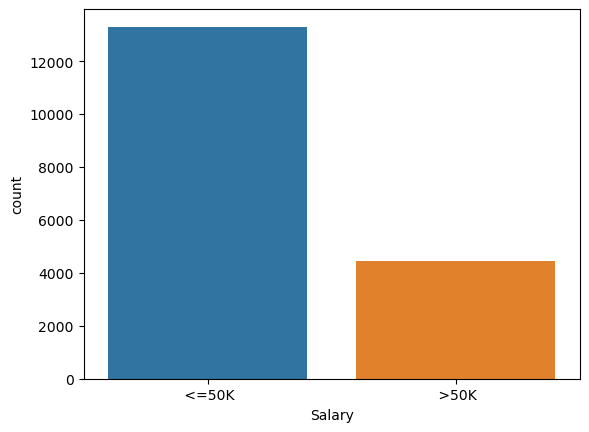

 <=50K    13302
 >50K      4461
Name: Salary, dtype: int64

In [23]:
sns.countplot(x='Salary',data= data_train)
plt.xlabel('Salary')
plt.ylabel('count')
plt.show()
data_train['Salary'].value_counts()

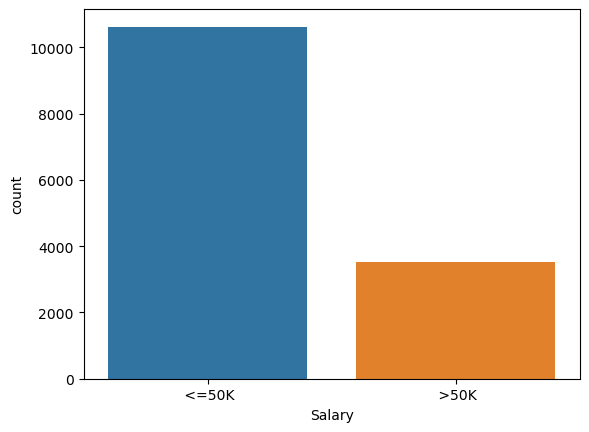

 <=50K    10620
 >50K      3510
Name: Salary, dtype: int64

In [24]:
sns.countplot(x='Salary',data= data_test)
plt.xlabel('Salary')
plt.ylabel('count')
plt.show()
data_test['Salary'].value_counts()

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='occupation', ylabel='workclass'>

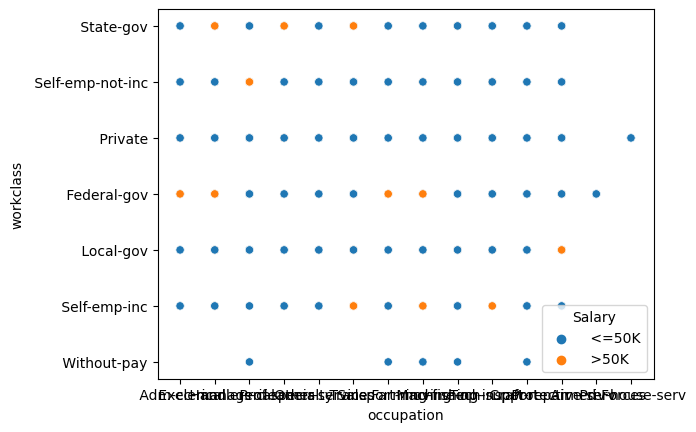

In [25]:
sns.scatterplot(data_train['occupation'],data_train['workclass'],hue=data_train['Salary'])

<AxesSubplot:xlabel='education'>

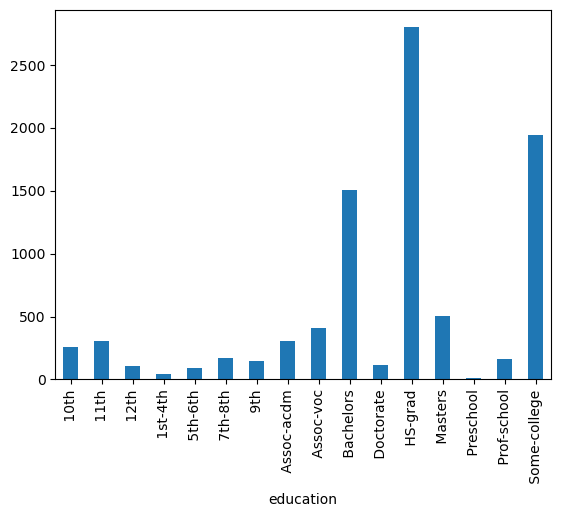

In [26]:
pd.crosstab(data_train['Salary'],data_train['education']).mean().plot(kind='bar')

<AxesSubplot:xlabel='occupation'>

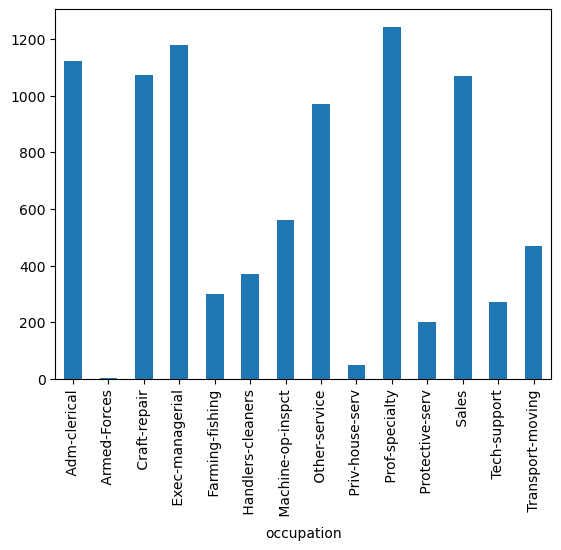

In [27]:
pd.crosstab(data_train['Salary'],data_train['occupation']).mean().plot(kind='bar')

<AxesSubplot:xlabel='workclass'>

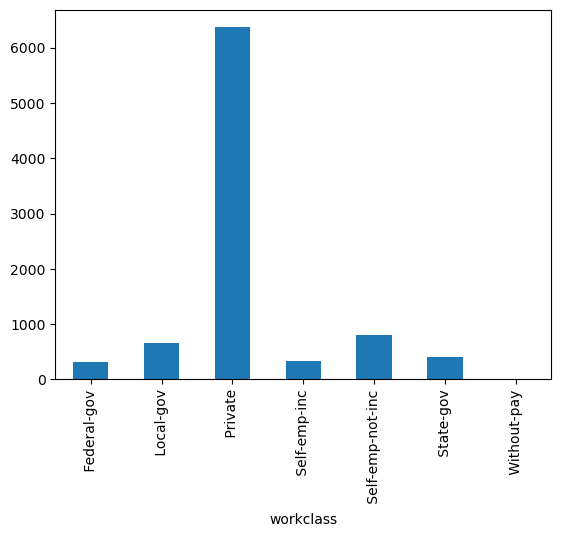

In [28]:
pd.crosstab(data_train['Salary'],data_train['workclass']).mean().plot(kind='bar')

In [29]:
string_columns = ["workclass","education","maritalstatus","occupation","relationship","race","sex","native"]

In [30]:
number = LabelEncoder()
for i in string_columns:
        data_train[i]= number.fit_transform(data_train[i])
        data_test[i]=number.fit_transform(data_test[i])

In [31]:
colnames = data_train.columns
colnames

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [32]:
data_test['maritalstatus'].value_counts()

2    6490
4    4501
0    2026
5     470
6     450
3     182
1      11
Name: maritalstatus, dtype: int64

In [33]:
data_train['capitalgain'] = data_train['capitalgain'].fillna(0)

In [34]:
data_train['capitalloss'] = data_train['capitalloss'].fillna(0)

In [35]:
data_train['hoursperweek'] = data_train['hoursperweek'].fillna(0)

In [36]:
data_train['Salary'] = data_train['Salary'].fillna('0')

In [37]:
x_train = data_train[colnames[0:13]].values
y_train = data_train[colnames[13]].values
x_test = data_test[colnames[0:13]].values
y_test = data_test[colnames[13]].values

In [38]:
##Normalmization
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [39]:
x_train

array([[39.,  5.,  9., ...,  0., 40., 37.],
       [50.,  4.,  9., ...,  0., 13., 37.],
       [38.,  2., 11., ...,  0., 40., 37.],
       ...,
       [33.,  2., 12., ...,  0., 50., 37.],
       [37.,  2., 11., ...,  0., 48., 37.],
       [53.,  2.,  9., ...,  0.,  0., 40.]])

In [40]:
data_train.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [41]:
data_test.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [42]:
x_test

array([[25,  2,  1, ...,  0, 40, 37],
       [38,  2, 11, ...,  0, 50, 37],
       [28,  1,  7, ...,  0, 40, 37],
       ...,
       [38,  2,  9, ...,  0, 50, 37],
       [44,  2,  9, ...,  0, 40, 37],
       [35,  3,  9, ...,  0, 60, 37]], dtype=int64)

In [43]:
y_train

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', '0'],
      dtype=object)

In [44]:
y_test

array([' <=50K', ' <=50K', ' >50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [45]:
x_train = norm_func(x_train)
x_test =  norm_func(x_test)

# Naive Bayes for classification

In [50]:
# Preparing a naive bayes model on training data set 

from sklearn.naive_bayes import MultinomialNB as MB

nb = MB()

In [51]:
train_pred_multi=nb.fit(x_train,y_train).predict(x_train)
test_pred_multi=nb.fit(x_train,y_train).predict(x_test)

In [52]:
train_acc_multi=np.mean(train_pred_multi==y_train)
train_acc_multi

0.7488178338212115

In [53]:
test_acc_multi=np.mean(test_pred_multi==y_test)
test_acc_multi

0.7515923566878981

In [54]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, test_pred_multi)

In [55]:
#print the matrix
confusion_matrix

array([[10620,     0],
       [ 3510,     0]], dtype=int64)

In [56]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,test_pred_multi))

0.7515923566878981


In [57]:
from sklearn.naive_bayes import GaussianNB as GB
G_model=GB()
train_pred_gau=G_model.fit(x_train,y_train).predict(x_train)
test_pred_gau=G_model.fit(x_train,y_train).predict(x_test)

In [58]:
train_acc_gau=np.mean(train_pred_gau==y_train)
train_acc_gau

0.7981873451925242

In [64]:
test_acc_gau=np.mean(test_pred_gau==y_test)
test_acc_gau

0.79723991507431

In [66]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, test_pred_gau)

In [67]:
confusion_matrix

array([[10073,   547],
       [ 2318,  1192]], dtype=int64)

In [68]:
print(accuracy_score(y_test,test_pred_gau))

0.79723991507431
